## Volumetric connected components extraction

In [1]:
from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
%matplotlib inline

In [2]:
#function to create test cases
def create_bin_sphere(arr_size, center, r):
    coords = np.ogrid[:arr_size[0], :arr_size[1], :arr_size[2]]
    distance = np.sqrt((coords[0] - center[0])**2 + (coords[1]-center[1])**2 + (coords[2]-center[2])**2) 
    return 1*(distance <= r)

In [3]:
def max_connected_volume_extraction(image):
    '''Extract conneted voxels from 3D binary image
    Input: binary 3D numpy array, type: int8
    Output: binary 3D numpy array, type: int8
    '''
    img_buff = image.copy()
    img_buff_lb = image.copy()
    img_buff = 1*(img_buff>0)
    img_buff_lb = np.array(img_buff_lb*10,np.uint8) 
    output_mask = np.zeros_like(img_buff)
    connectivity_array = np.zeros_like(img_buff)
    label_image = label(img_buff_lb)

    for i in range(0,len(img_buff)):
        if i == 0:
            connectivity_array[i,...] = img_buff[i+1,...]&img_buff[i,...]
        elif i == len(img_buff)-1:
            connectivity_array[i,...] = img_buff[i,...]&img_buff[i-1,...]
        else:
            connectivity_array[i,...] = (img_buff[i-1,...]&img_buff[i,...])|(img_buff[i+1,...]&img_buff[i,...]) 

    multip_arr = label_image*connectivity_array
    areas = list(np.unique(multip_arr[multip_arr>0]))

    for val in areas:
        output_mask[label_image==val]=1
    return output_mask

In [4]:
#Initializing test cases 
#Test case 1
volume1 = create_bin_sphere(arr_size=(20,20,20),center=(9,9,9), r=8)
volume2 = create_bin_sphere(arr_size=(20,20,20),center=(3,3,3), r=2)
volume3 = create_bin_sphere(arr_size=(20,20,20),center=(15,15,15), r=4)
test_case = (volume1|volume2)|volume3
not_connected = np.zeros_like(test_case)
not_connected[0,15:,15:]=1
not_connected[17,1:5,1:5]=1
extracted = max_connected_volume_extraction(test_case|not_connected)

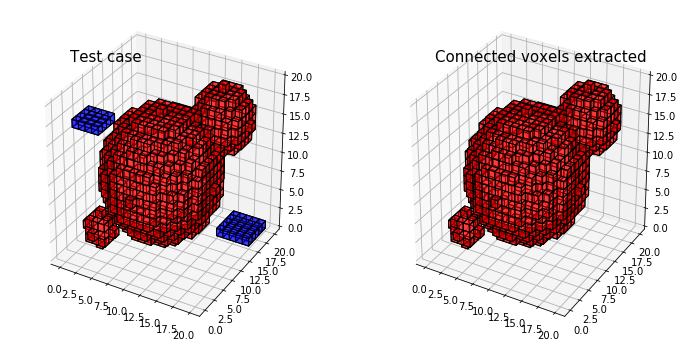

In [5]:
#Visualize
colors = [1, 0, 0, 0.5]
colors2 = [0, 0, 1, 0.5]

fig =plt.figure(figsize=(12,6))
fig.tight_layout()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.gca(projection='3d')
ax1.voxels(test_case.transpose(2,1,0), facecolors=colors, edgecolor='k')
ax1.voxels(not_connected.transpose(2,1,0), facecolors=colors2, edgecolor='k')
ax1.text(0.9,1,25,'Test case',fontsize=15)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax1 = fig.gca(projection='3d')
ax1.voxels(extracted.transpose(2,1,0), facecolors=colors, edgecolor='k')
ax1.text(0.9,1,25,'Connected voxels extracted',fontsize=15)
plt.show()